In [1]:
%matplotlib inline
import geopandas as gp
from simpledbf import Dbf5
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import re
from shapely.wkt import loads
import math

PyTables is not installed. No support for HDF output.


In [243]:
def weight(X,N, p=2):
    return 1/(euclidean_distance(X.x, X.y, N.x, N.y)**p)

def euclidean_distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

def Inverse_distance_weighting(X):
    interpolated_val_numerator = 0
    interpolated_val_denominator = 0
    for idx, value in bg[bg.within(cousub.loc[0].geometry)].iterrows():
        interpolated_val_numerator += weight(X,value.centroid)*value.RAW_SCORE 
        interpolated_val_denominator += weight(X,value.centroid)
        
    return interpolated_val_numerator/interpolated_val_denominator

def fit_to_cousub(geom):
    new = cousub.loc[0].geometry.intersection(geom)
    if new.geom_type == ('Polygon' or 'MultiPolygon'):
        return new
    else: 
        return geom

In [3]:
cousub = gp.read_file("lakewood_cdd.shp")

In [67]:
bg = gp.read_file("lakewood_bg.shp")
bg['centroid'] = bg.geometry.centroid

In [69]:
blocks = gp.read_file("tl_2010_39035_tabblock10/tl_2010_39035_tabblock10.shp")
blocks['centroid'] = blocks.geometry.centroid

In [70]:
blocks["geometry"] = blocks[blocks.intersects(cousub.loc[0].geometry)]["geometry"].apply(fit_to_cousub)
blocks["geometry"] = blocks["geometry"].fillna(0)

In [71]:
blocks["RAW_SCORE"] = blocks[blocks.intersects(cousub.loc[0].geometry)]["centroid"].apply(Inverse_distance_weighting)

In [252]:
bg['coords'] = bg['geometry'].apply(lambda x: x.representative_point().coords[:])
bg['coords'] = [coords[0] for coords in bg['coords']]

blocks['coords'] = blocks['geometry'].apply(lambda x: x.representative_point().coords[:])
blocks['coords'] = [coords[0] for coords in blocks['coords']]

AttributeError: 'int' object has no attribute 'representative_point'

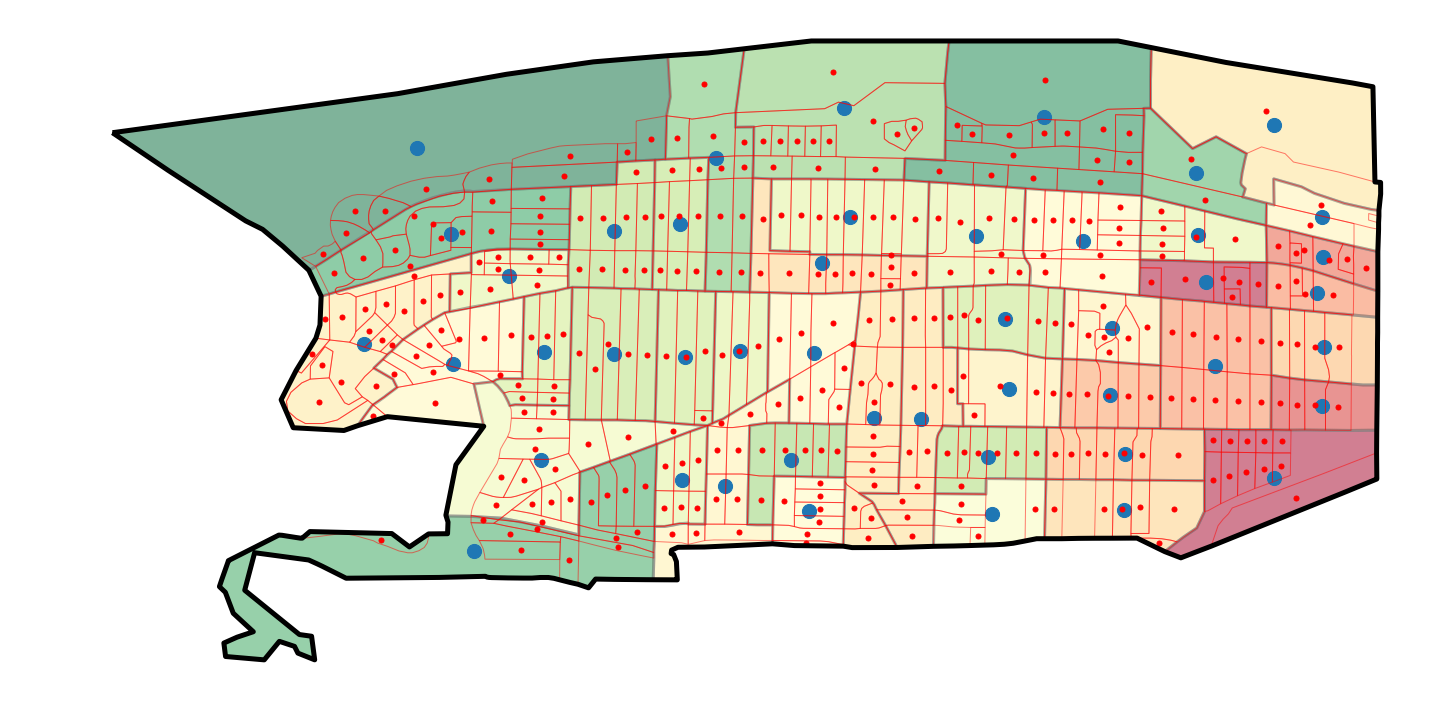

In [29]:
ax = bg.loc[bg.within(cousub.loc[0].geometry)].plot(
#     ax=ax,
#     column='UNITS',
#     cmap='RdYlGn',
#     legend=True,
    edgecolor='grey',
    linewidth=3,
    column='RAW_SCORE',
    cmap='RdYlGn',
#     color='none',
    figsize=(25, 25),
    alpha = 0.5,
)

bg.loc[bg.within(cousub.loc[0].geometry)].centroid.plot(
    ax=ax,
    markersize=200,
)

blocks.loc[blocks.within(cousub.loc[0].geometry)].plot(
    color='none',
    ax=ax,
    edgecolor='red',
    linewidth=1,
    alpha = 0.5,
)

blocks.loc[blocks.within(cousub.loc[0].geometry)].centroid.plot(
    ax=ax,
    color='red',
    markersize=25,
)

cousub.plot(
    ax=ax,
    edgecolor='black',
    linewidth=5,
    figsize=(25, 25),
    color='none',
    alpha=1,
)



ax.set_axis_off()
# plt.savefig('')
plt.show()

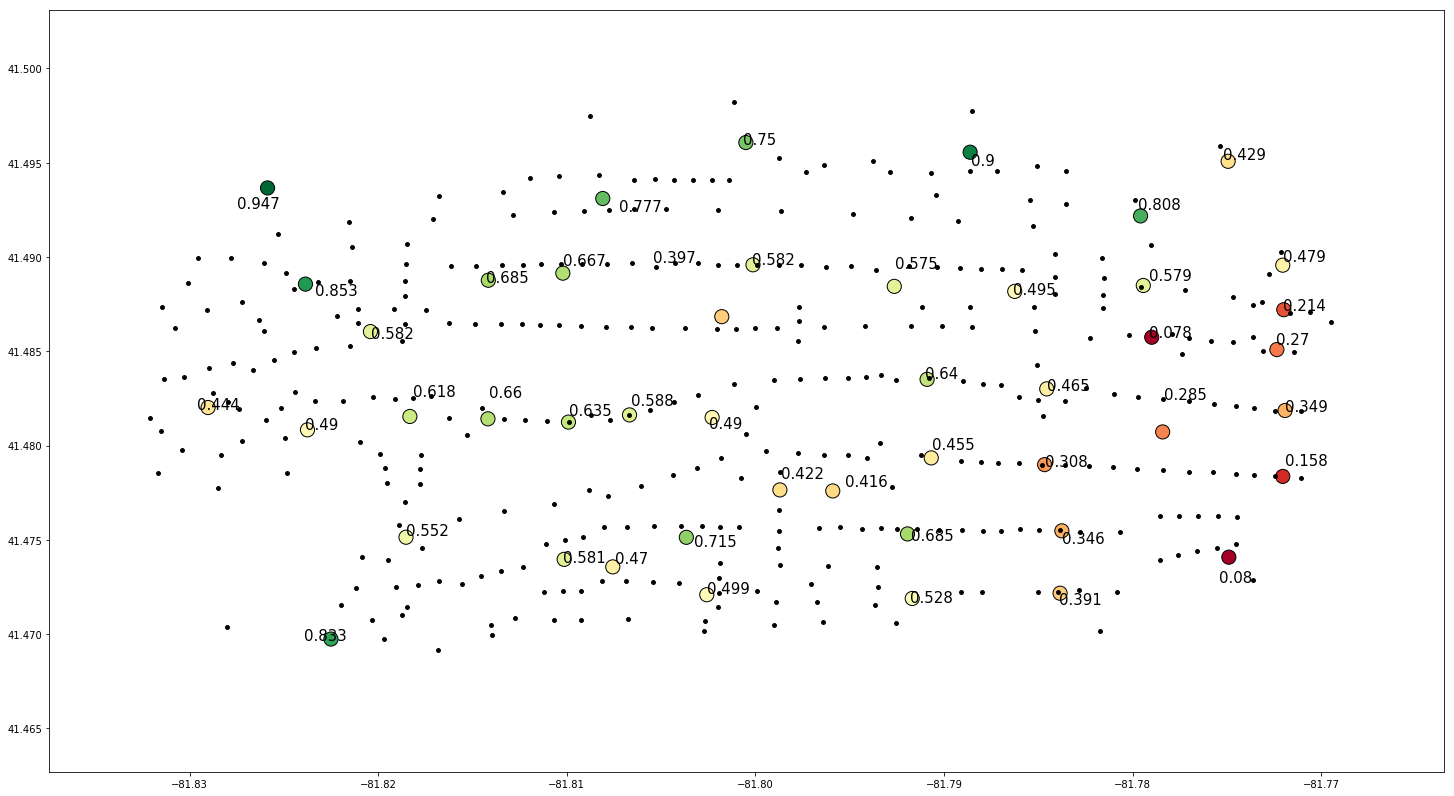

In [31]:
fig, ax = plt.subplots(figsize=(25, 25),)

bg.loc[bg.within(cousub.loc[0].geometry)].rename(index=str, columns={"geometry": "geometry2", "centroid": "geometry"}).plot(
    ax=ax,
    markersize=200,
    column = 'RAW_SCORE',
    edgecolor = 'black',
    cmap = 'RdYlGn', 
)

blocks.loc[blocks.within(cousub.loc[0].geometry)].centroid.plot(
    ax=ax,
    color='black',
    markersize=15,
)

for idx, row in bg[bg.within(cousub.loc[0].geometry)].iterrows():
    ax.annotate(s=row['RAW_SCORE'], 
                xy=row['coords'],
                horizontalalignment='top',
                fontsize= 15,
               )


C:\Users\Art Perkitny\Anaconda3\lib\site-packages\geopandas\geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


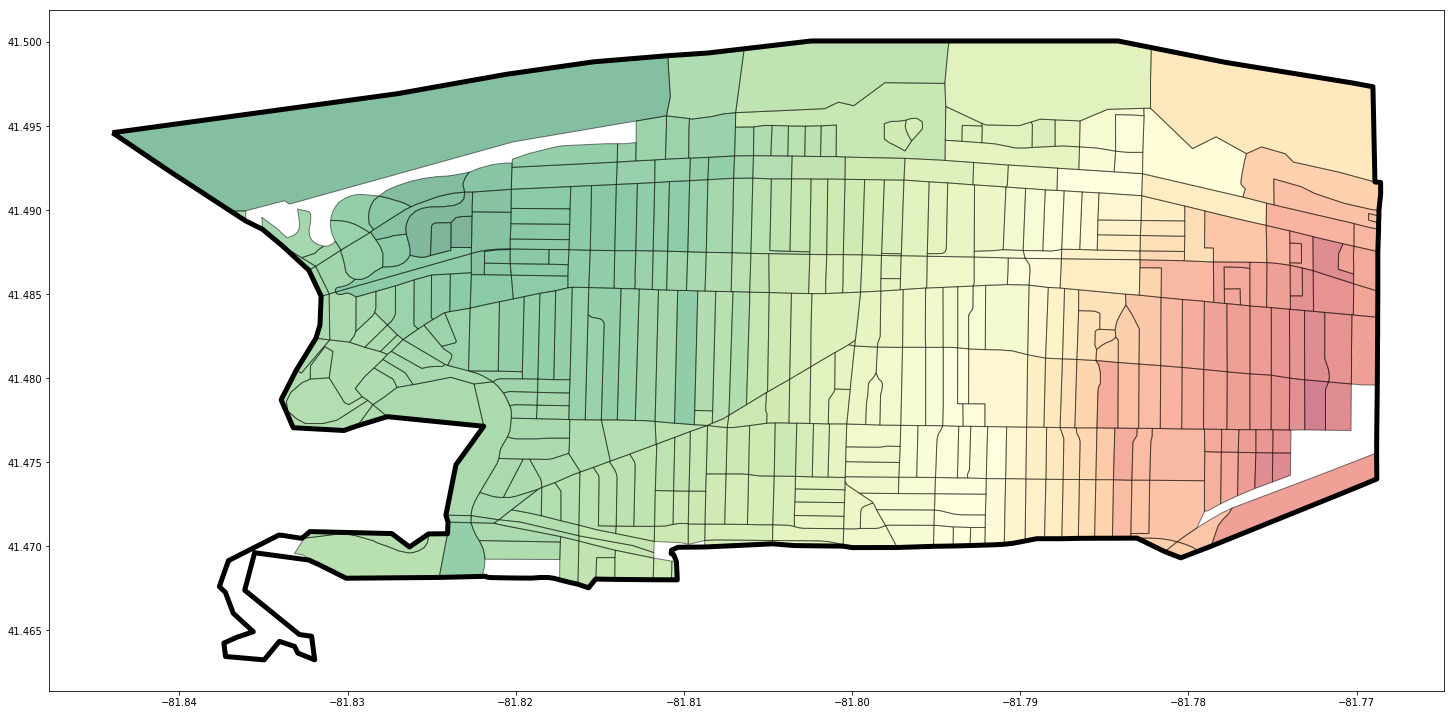

In [265]:
fig, ax = plt.subplots(figsize=(25, 25),)

blocks.loc[blocks.within(cousub.loc[0].geometry)][blocks["geometry"].area<=5.0e-02].plot(
    ax=ax,
    edgecolor='black',
    linewidth=1,
    column='RAW_SCORE',
    cmap='RdYlGn',
#     color='none',
    figsize=(25, 25),
    alpha = 0.5,
)

cousub.plot(
    ax=ax,
    edgecolor='black',
    linewidth=5,
    figsize=(25, 25),
    color='none',
    alpha=1,
)

# blocks[blocks["GEOID10"]=='390351601001000'].plot(ax=ax,alpha=0.2)

# for idx, row in bg[blocks.within(cousub.loc[0].geometry)].iterrows():
#     ax.annotate(s=row['RAW_SCORE'], 
#                 xy=row['coords'],
#                 horizontalalignment='top',
#                 fontsize= 15,
#                )


C:\Users\Art Perkitny\Anaconda3\lib\site-packages\geopandas\geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


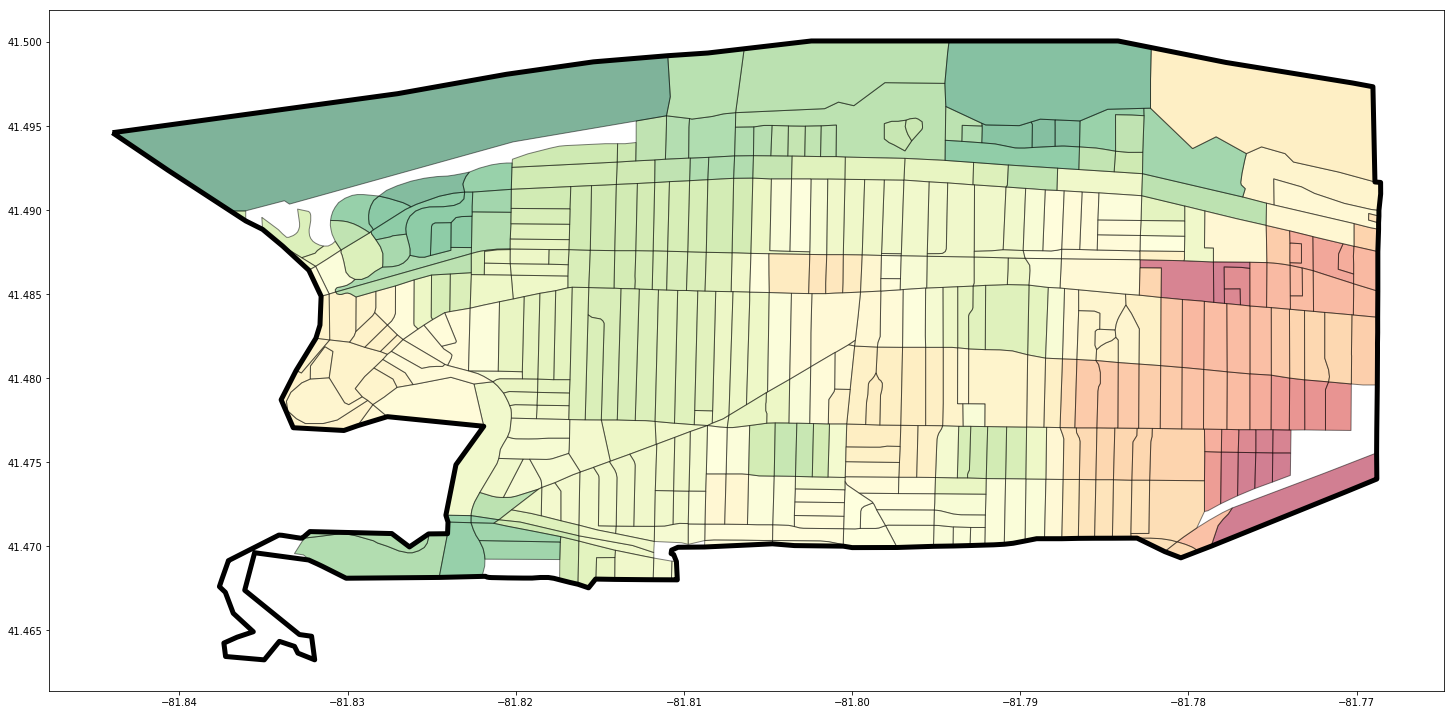

In [269]:
fig, ax = plt.subplots(figsize=(25, 25),)

blocks.loc[blocks.within(cousub.loc[0].geometry)][blocks["geometry"].area<=5.0e-02].plot(
    ax=ax,
    edgecolor='black',
    linewidth=1,
    column='RAW_SCORE',
    cmap='RdYlGn',
#     color='none',
    figsize=(25, 25),
    alpha = 0.5,
)

cousub.plot(
    ax=ax,
    edgecolor='black',
    linewidth=5,
    figsize=(25, 25),
    color='none',
    alpha=1,
)

# blocks[blocks["GEOID10"]=='390351601001000'].plot(ax=ax,alpha=0.2)

# for idx, row in bg[blocks.within(cousub.loc[0].geometry)].iterrows():
#     ax.annotate(s=row['RAW_SCORE'], 
#                 xy=row['coords'],
#                 horizontalalignment='top',
#                 fontsize= 15,
#                )


In [202]:
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show,rcParams
from numpy import exp,arange
import matplotlib.pyplot as plt
from scipy import ndimage

In [209]:
bounds = cousub.geometry.bounds
x = arange(bounds['minx'].min(), bounds['maxx'].max(), (bounds['maxx'].max()-bounds['minx'].min())/60)
y = arange(bounds['miny'].min(), bounds['maxy'].max(), (bounds['maxy'].max()-bounds['miny'].min())/60)

In [210]:
def euclidean_distance2(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

def weight2(X,Y,N, p=4):
    return 1/(euclidean_distance2(X, Y, N.x, N.y)**p)

def Inverse_distance_weighting2(X,Y):
    vals = []
    for x in X:
        vals2 = []
        for y in Y:
            interpolated_val_numerator = 0
            interpolated_val_denominator = 0
            for idx, value in bg[bg.within(cousub.loc[0].geometry)].iterrows():
                interpolated_val_numerator += weight2(x,y,value.centroid)*value.RAW_SCORE 
                interpolated_val_denominator += weight2(x,y,value.centroid)
            vals2.append(interpolated_val_numerator/interpolated_val_denominator)
        vals.append(vals2)
        
    return vals

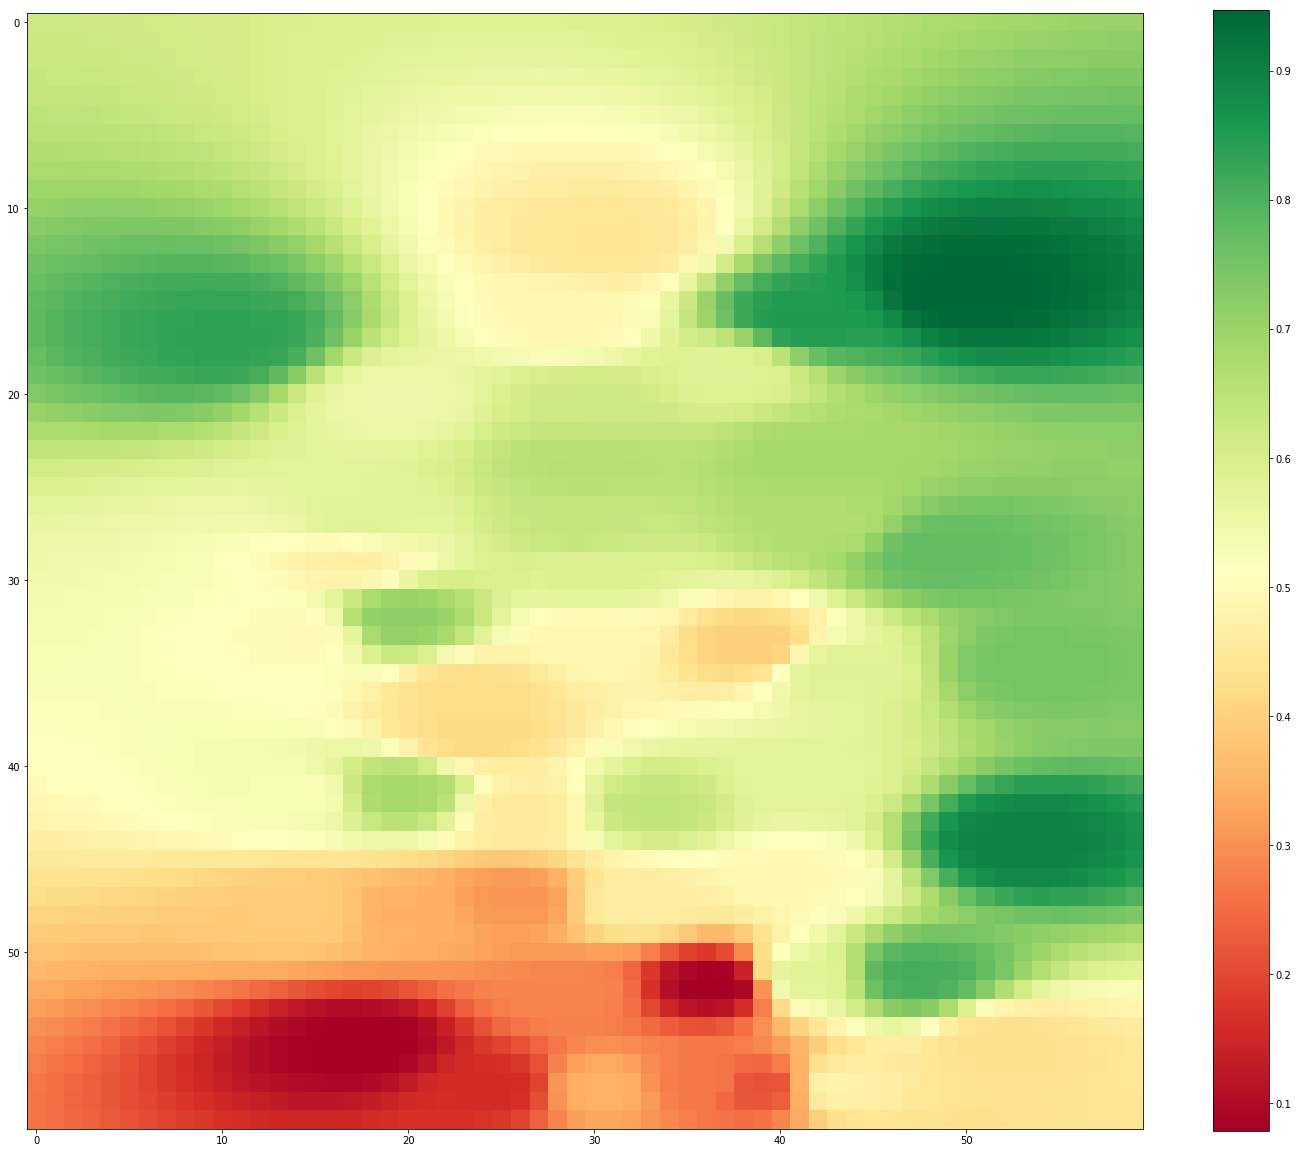

In [211]:
# X,Y = meshgrid(x, y, sparse=False) # grid of point
Z = Inverse_distance_weighting2(x, y) # evaluation of the function on the grid

im = imshow(Z,cmap='RdYlGn') # drawing the function
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im,shrink=0.825) # adding the colobar on the right
show()

In [253]:
import numpy as np
num_pts=1500
bounds = cousub.geometry.bounds
sampl_x = np.random.uniform(bounds['minx'].min(), bounds['maxx'].max(), size=(num_pts))
sampl_y = np.random.uniform(bounds['miny'].min(), bounds['maxy'].max(), size=(num_pts))
points = geometry = [Point(xy) for xy in zip(sampl_x, sampl_y)]
random_points = gp.GeoDataFrame(geometry=points)
random_points["RAW_SCORE"] = random_points[random_points.intersects(
    cousub.loc[0].geometry)]["geometry"].apply(Inverse_distance_weighting)

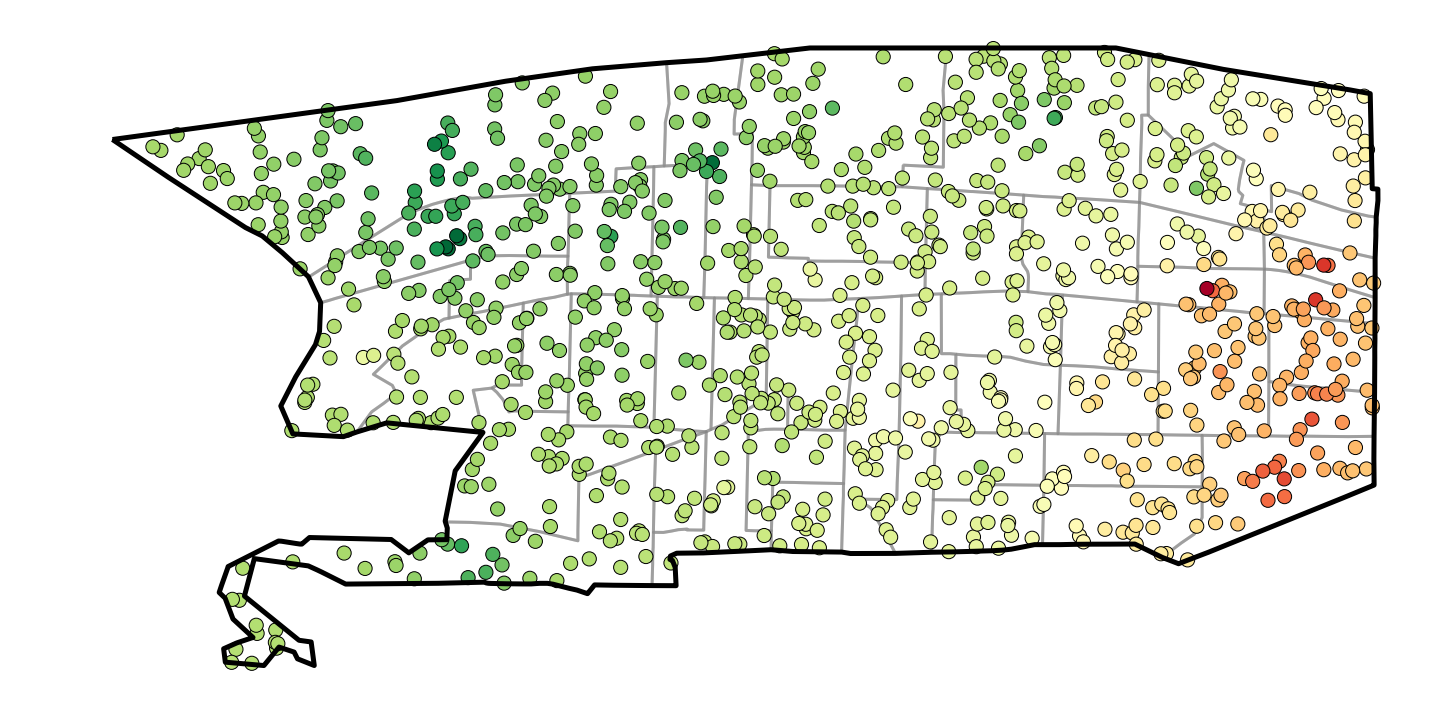

In [254]:
ax = bg.loc[bg.within(cousub.loc[0].geometry)].plot(
#     ax=ax,
#     column='UNITS',
#     cmap='RdYlGn',
#     legend=True,
    edgecolor='grey',
    linewidth=3,
#     column='RAW_SCORE',
#     cmap='RdYlGn',
    color='none',
    figsize=(25, 25),
    alpha = 0.5,
)

random_points[random_points.within(cousub.geometry.item())].plot(
    ax=ax,
    markersize=200,
    column = 'RAW_SCORE',
    edgecolor = 'black',
    cmap = 'RdYlGn', 
)

cousub.plot(
    ax=ax,
    edgecolor='black',
    linewidth=5,
    figsize=(25, 25),
    color='none',
    alpha=1,
)



ax.set_axis_off()
# plt.savefig('')
plt.show()

# Shape Intersection Problem 

C:\Users\Art Perkitny\Anaconda3\lib\site-packages\geopandas\geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


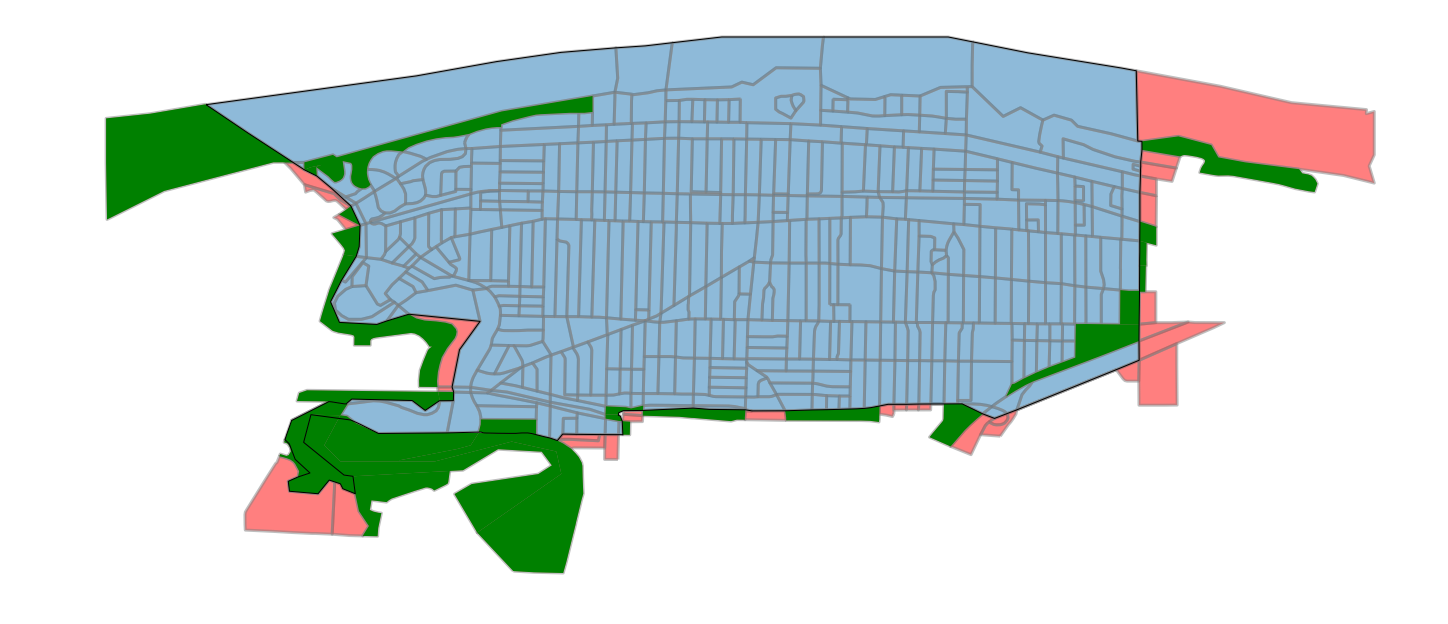

In [112]:
ax = blocks.loc[blocks.within(cousub.loc[0].geometry)][blocks["geometry"].area<=5.0e-02].plot(
#     ax=ax,
#     column='UNITS',
#     cmap='RdYlGn',
#     legend=True,
    edgecolor='grey',
    linewidth=3,
#     column='RAW_SCORE',
#     cmap='RdYlGn',
#     color='red',
    figsize=(25, 25),
    alpha = 0.5,
)

ax = blocks.loc[~blocks.within(cousub.loc[0].geometry)][blocks.intersects(cousub.loc[0].geometry)][blocks["geometry"].area<=5.0e-02].plot(
    ax=ax,
#     column='UNITS',
#     cmap='RdYlGn',
#     legend=True,
    edgecolor='grey',
    linewidth=3,
#     column='RAW_SCORE',
#     cmap='RdYlGn',
    color='red',
    figsize=(25, 25),
    alpha = 0.5,
)

# blocks.loc[13321:13321].plot(ax=ax,color='green')

blocks.loc[blocks.overlaps(cousub.loc[0].geometry)][blocks["geometry"].area<=5.0e-02].plot(ax=ax,color='green')

cousub.plot(
    ax=ax,
    edgecolor='black',
    linewidth=1,
    figsize=(25, 25),
    color='none',
    alpha=1,
)



# add_basemap(ax, zoom=13, url=ctx.sources.ST_TONER)
ax.set_axis_off()
# plt.savefig('boise2.svg')
plt.show()

In [25]:
blocks.loc[~blocks.within(cousub.loc[0].geometry)][blocks.intersects(cousub.loc[0].geometry)][blocks["geometry"].area<=5.0e-02]

C:\Users\Art Perkitny\Anaconda3\lib\site-packages\geopandas\geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,centroid
261,39,035,123200,2006,390351232002006,Block 2006,G5040,U,17668,U,S,4338,0,+41.4702346,-081.7860806,"POLYGON ((-81.785583 41.470478, -81.785601 41....",POINT (-81.78608060579521 41.47023455694534)
262,39,035,101102,1011,390351011021011,Block 1011,G5040,U,17668,U,S,16417,0,+41.4880545,-081.7680584,"POLYGON ((-81.767403 41.488608, -81.7674000000...",POINT (-81.7680583524745 41.48805445567077)
287,39,035,123501,2000,390351235012000,Block 2000,G5040,U,17668,U,S,19059,0,+41.4730478,-081.7695209,"POLYGON ((-81.7688 41.474001, -81.768829 41.47...",POINT (-81.76952093136826 41.47304783435947)
987,39,035,101102,1000,390351011021000,Block 1000,G5040,R,None,None,S,0,943961,+41.4928276,-081.7593007,"POLYGON ((-81.755912 41.48939499999999, -81.76...",POINT (-81.75930090505491 41.49282749739747)
1413,39,035,101400,1007,390351014001007,Block 1007,G5040,U,17668,U,S,121744,0,+41.4725366,-081.7672087,"POLYGON ((-81.76869499999999 41.474047, -81.76...",POINT (-81.76720866499272 41.47253661168487)
2336,39,035,123100,1001,390351231001001,Block 1001,G5040,U,17668,U,S,256,0,+41.4699447,-081.8003530,"POLYGON ((-81.80052999999999 41.469904, -81.80...",POINT (-81.800353 41.46994466666666)
2789,39,035,123100,1003,390351231001003,Block 1003,G5040,U,17668,U,S,5201,0,+41.4697701,-081.8095246,"POLYGON ((-81.808792 41.469596, -81.8087949999...",POINT (-81.80952455241757 41.46977013033101)
3055,39,035,181203,1005,390351812031005,Block 1005,G5040,U,17668,U,S,78594,0,+41.4750408,-081.8242118,"POLYGON ((-81.82533699999999 41.471847, -81.82...",POINT (-81.82421178047956 41.47504076939505)
3060,39,035,181204,2000,390351812042000,Block 2000,G5040,U,17668,U,S,4527,0,+41.4716446,-081.8246974,"POLYGON ((-81.824158 41.471848, -81.8240299999...",POINT (-81.8246973836024 41.47164456329511)
3140,39,035,101300,1013,390351013001013,Block 1013,G5040,U,17668,U,S,9592,0,+41.4825864,-081.7684892,"POLYGON ((-81.76875099999999 41.483617, -81.76...",POINT (-81.76848919499972 41.48258639505518)


In [39]:
for key, value in blocks.loc[~blocks.within(cousub.loc[0].geometry)][blocks.intersects(cousub.loc[0].geometry)][blocks["geometry"].area<=5.0e-02].iterrows():
    if "1601" in value.TRACTCE10:
        print(key ,value)

13321 STATEFP10                                                    39
COUNTYFP10                                                  035
TRACTCE10                                                160100
BLOCKCE10                                                  1002
GEOID10                                         390351601001002
NAME10                                               Block 1002
MTFCC10                                                   G5040
UR10                                                          U
UACE10                                                    17668
UATYP10                                                       U
FUNCSTAT10                                                    S
ALAND10                                                  220744
AWATER10                                                   3246
INTPTLAT10                                          +41.4942290
INTPTLON10                                         -081.8162448
geometry      POLYGON ((-81.836058

C:\Users\Art Perkitny\Anaconda3\lib\site-packages\geopandas\geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


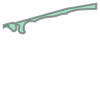

In [40]:
blocks.loc[13321 ].geometry

In [53]:
blocks.loc[13321 ][["geometry"]].apply(fit_to_cousub).item().within(cousub.loc[0].geometry)

Polygon


False

In [85]:
blocks.loc[13321 ][["geometry"]].apply(fit_to_cousub)

Polygon


geometry    POLYGON ((-81.83605899999998 41.489347, -81.83...
Name: 13321, dtype: object

In [57]:
new = cousub.loc[0].geometry.intersection(blocks.loc[13321 ].geometry)

In [105]:
new.overlaps(cousub.loc[0].geometry)

True

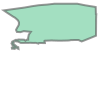

In [60]:
cousub.loc[0].geometry

In [92]:
print(blocks.loc[13321 ][["geometry"]].apply(fit_to_cousub).item().difference(cousub.loc[0].geometry))

Polygon
GEOMETRYCOLLECTION EMPTY


In [84]:
type(blocks.loc[13321 ][["geometry"]].apply(fit_to_cousub).item().difference(cousub.loc[0].geometry))

Polygon


shapely.geometry.collection.GeometryCollection

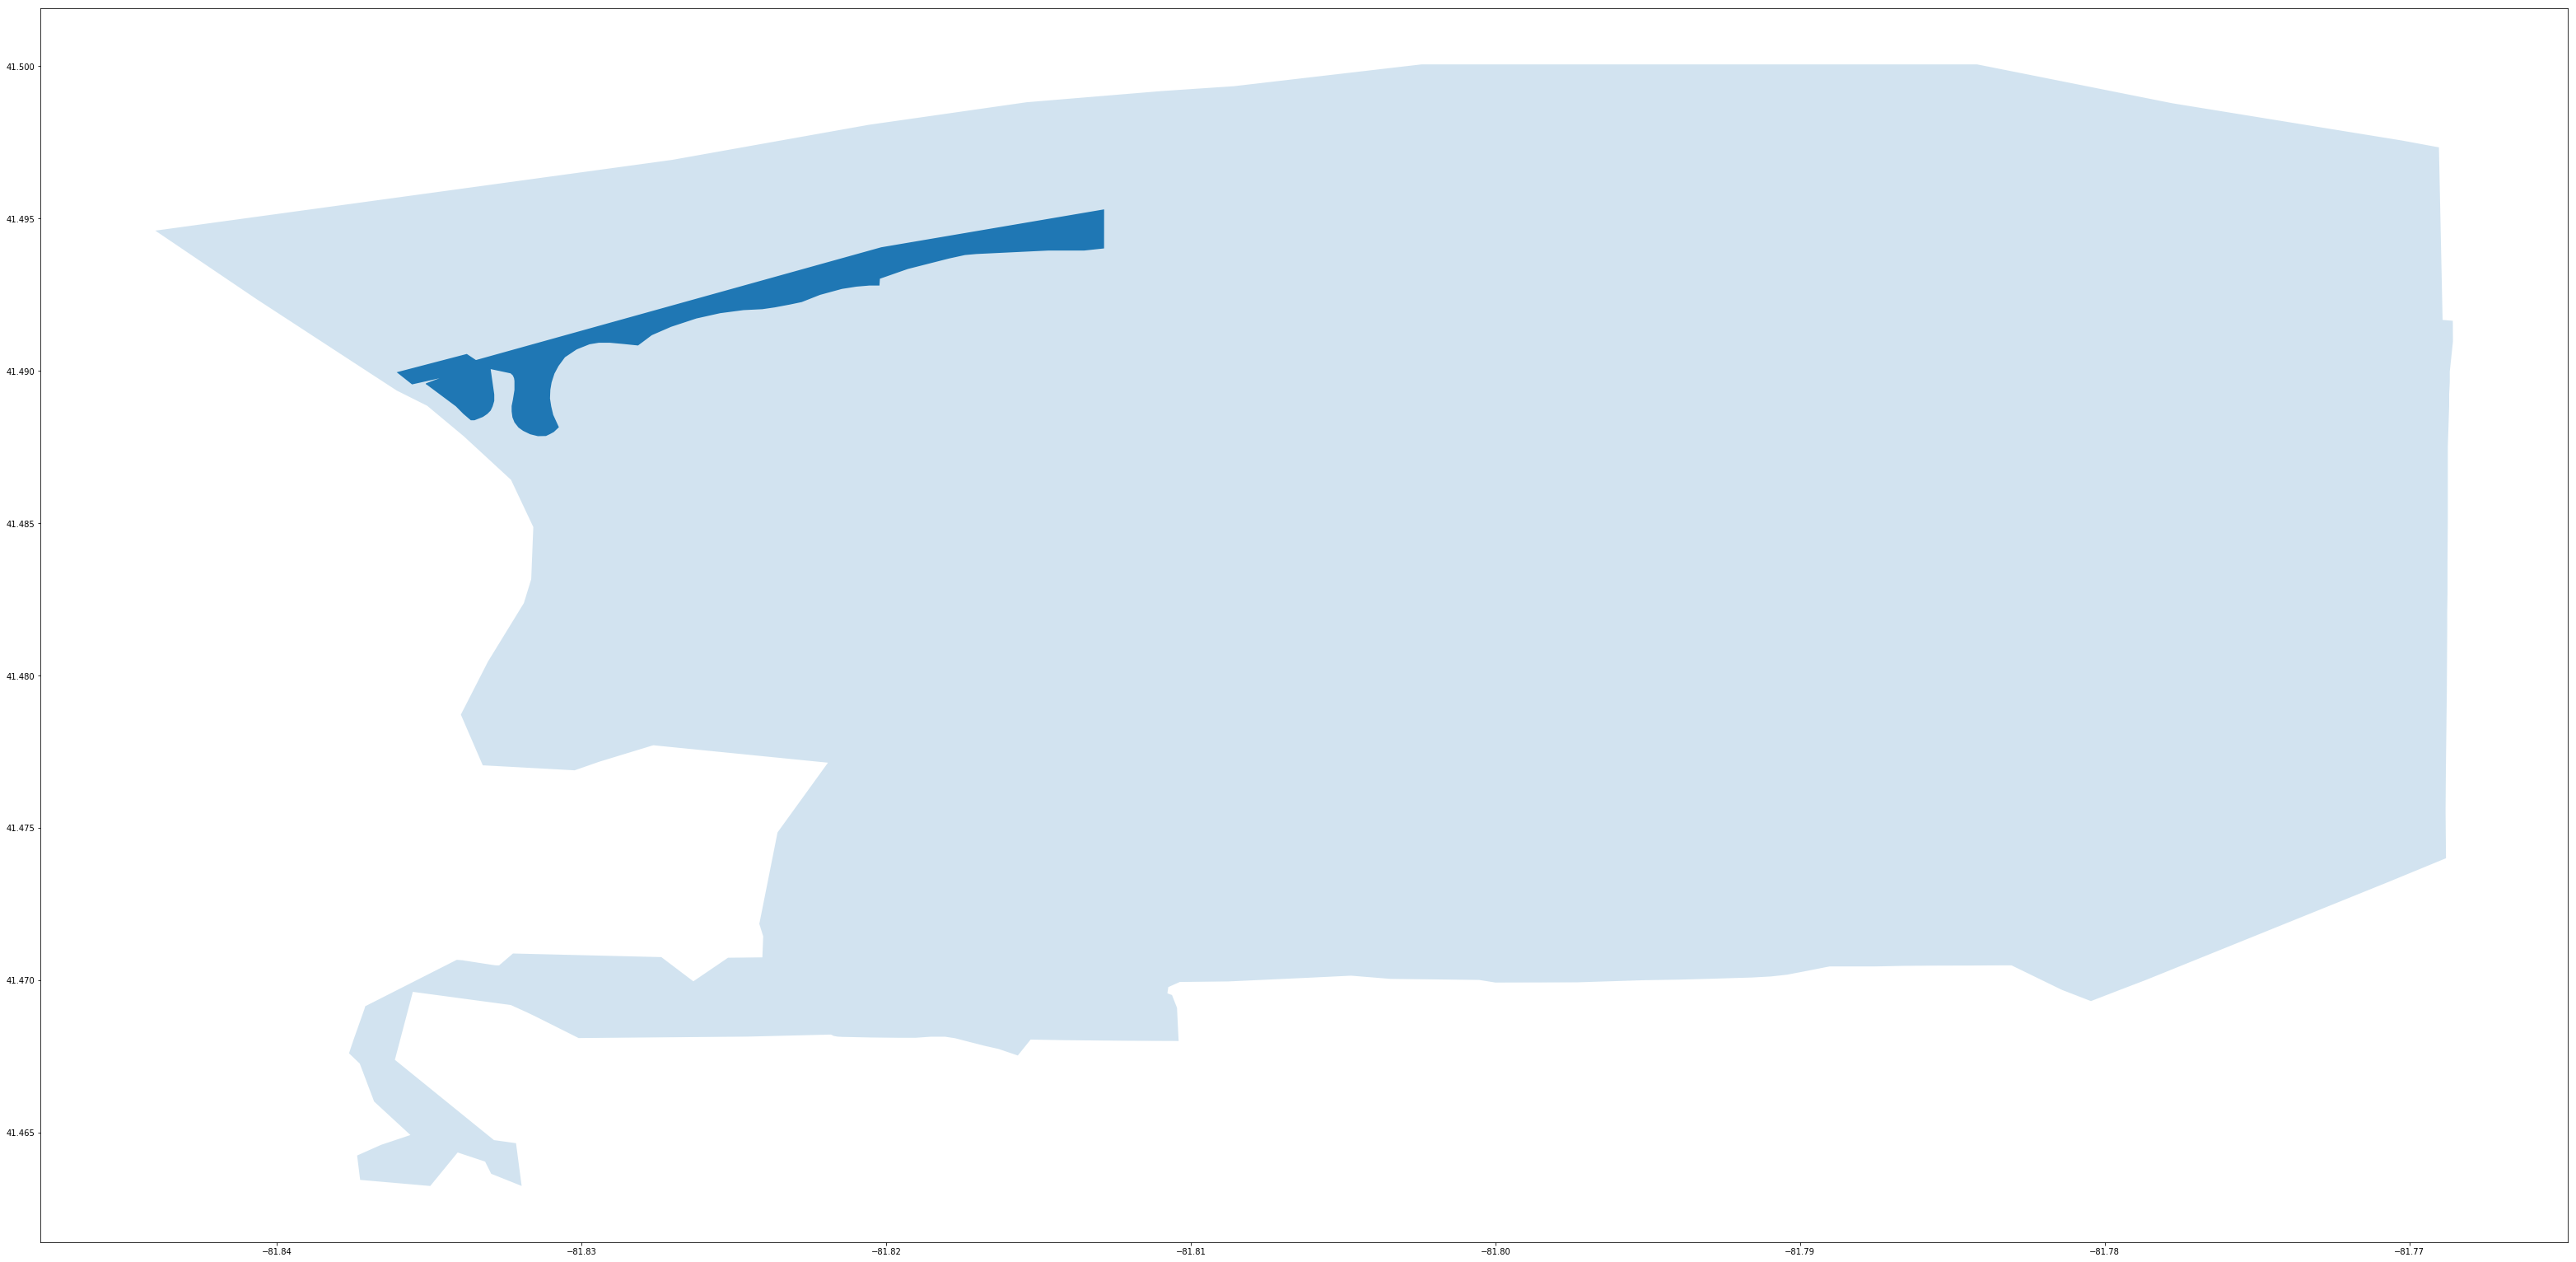

In [250]:
ax = blocks.loc[13321:13321].plot(figsize=(55,55),)
cousub.plot(ax=ax, alpha=0.2)

plt.savefig('lakewood.svg')

In [143]:
block_xy = []
for x,y in list(blocks.loc[13321].geometry.exterior.coords):
    block_xy.append((x,y))

In [144]:
cousub_xy = []
for x,y in list(cousub.loc[0].geometry.exterior.coords):
    cousub_xy.append((x,y))

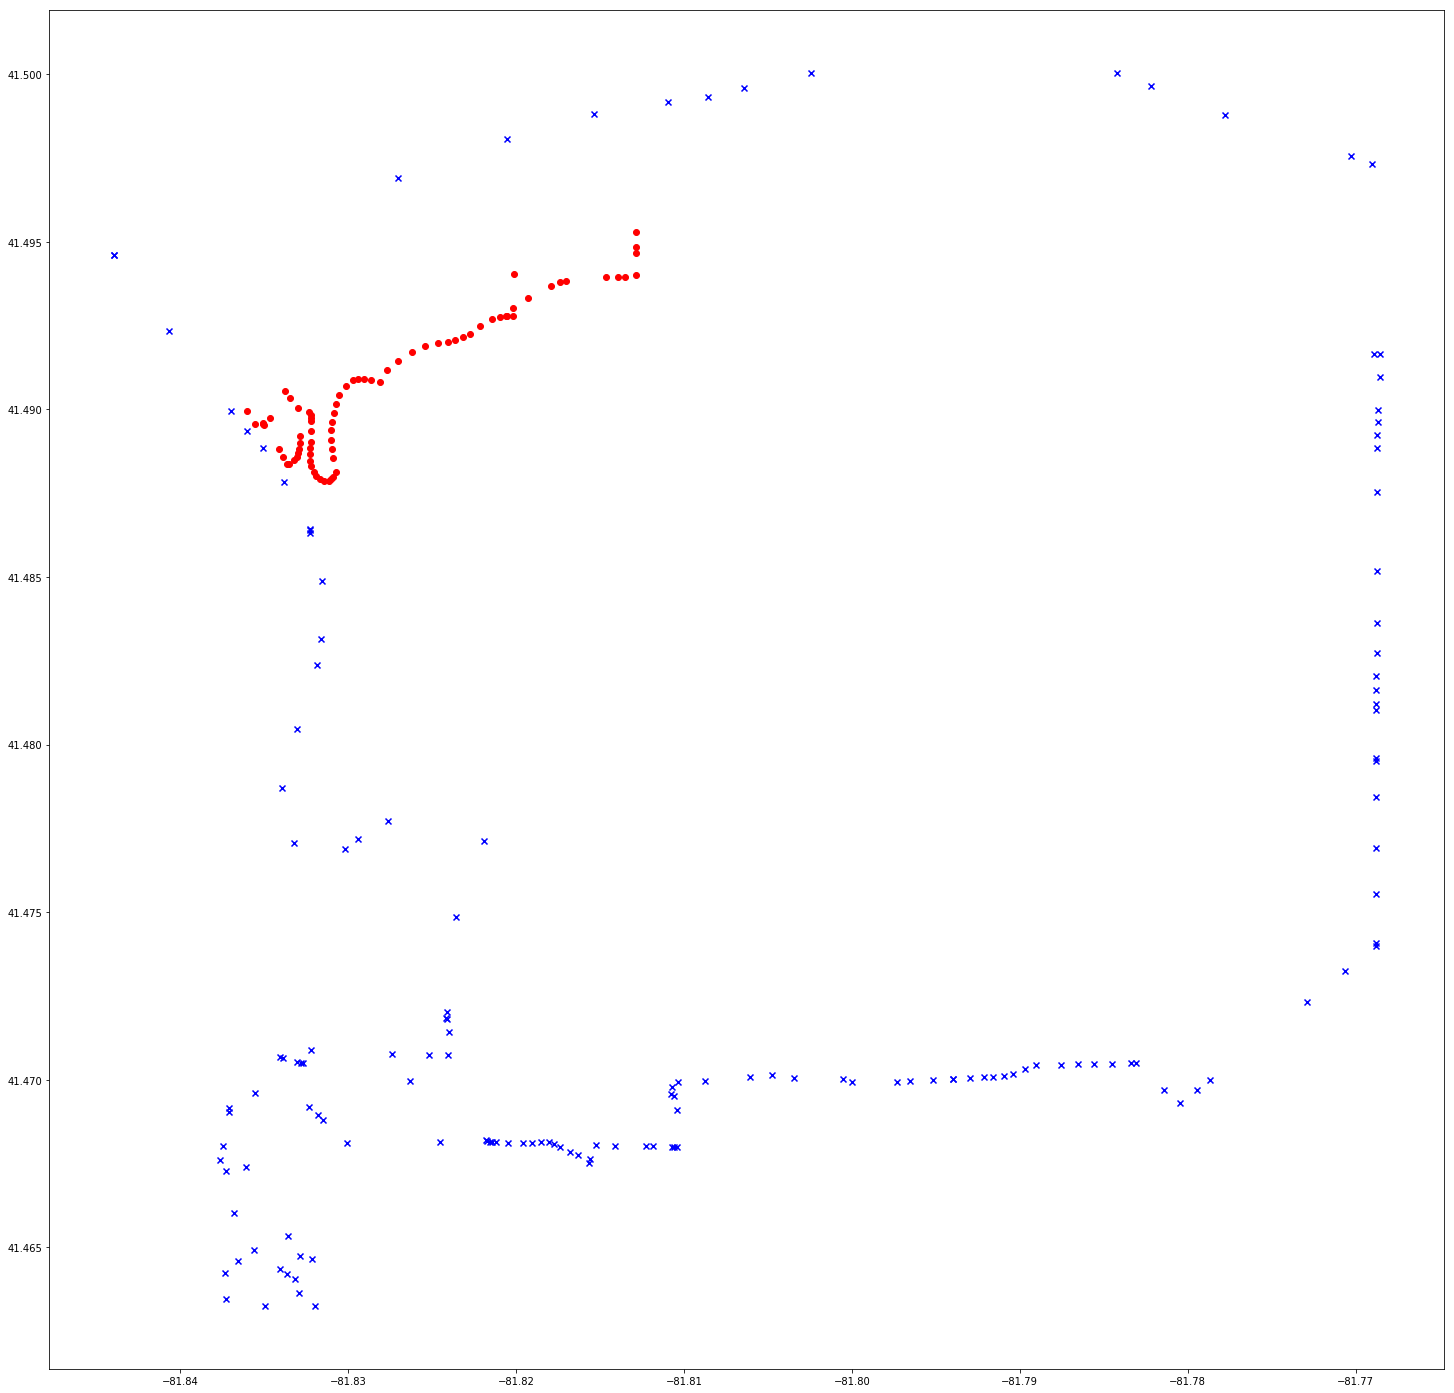

In [228]:
fig, ax = plt.subplots(figsize=(25, 25),)

plt.scatter(*zip(*block_xy), color='red')
plt.scatter(*zip(*cousub_xy), color='blue', alpha=1, marker='x')
plt.show()

In [226]:
dist = []
for n,(x,y) in enumerate(block_xy):
    for x2,y2 in cousub_xy:
        if x2 == x and y2 == y:
            print(n,x,y,x2,y2)
        elif euclidean_distance(x,y,x2,y2)<=1.5888218580782548e-14:
            print(n,x,y,x2,y2)
        dist.append(euclidean_distance(x,y,x2,y2))
        


79 -81.83605899999998 41.489346999999995 -81.83605899999999 41.489347


In [223]:
min(dist)

1.5888218580782548e-14

In [210]:
block_xy[1] = (-81.83605899999999, 41.489347)

In [216]:
block_xy[1] = (-81.83605899999999+0.005, 41.489347+0.005)

In [227]:
del block_xy[79]

In [229]:
from shapely import geometry
poly = geometry.Polygon([[p[0], p[1]] for p in block_xy])

In [231]:
poly.within(cousub.loc[0].geometry)

True

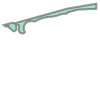

In [230]:
poly

In [249]:
blocks.iloc[13321, blocks.columns.get_loc('geometry')] = poly